# Question 1. Dowloading and preprocessing data

In [1]:
import pandas as pd 
import wbgapi as wb 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Query by keyword: 
wb.series.info(q='CO2')

id,value
EN.GHG.CO2.AG.MT.CE.AR5,Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)
EN.GHG.CO2.BU.MT.CE.AR5,Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)
EN.GHG.CO2.FE.MT.CE.AR5,Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)
EN.GHG.CO2.IC.MT.CE.AR5,Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)
EN.GHG.CO2.IP.MT.CE.AR5,Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)
EN.GHG.CO2.LU.DF.MT.CE.AR5,Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)
EN.GHG.CO2.LU.FL.MT.CE.AR5,Carbon dioxide (CO2) net fluxes from LULUCF - Forest Land (Mt CO2e)
EN.GHG.CO2.LU.MT.CE.AR5,Carbon dioxide (CO2) net fluxes from LULUCF - Total excluding non-tropical fires (Mt CO2e)
EN.GHG.CO2.LU.OL.MT.CE.AR5,Carbon dioxide (CO2) net fluxes from LULUCF - Other Land (Mt CO2e)
EN.GHG.CO2.LU.OS.MT.CE.AR5,Carbon dioxide (CO2) net fluxes from LULUCF - Organic Soil (Mt CO2e)


## Predictors
The following python dictionary contains the code of each selected variable and a proposed name for easier manipulation: 

In [3]:

indicators = {
    # TARGET
    'co2_total': 'EN.GHG.CO2.MT.CE.AR5',   # total CO2 (excl. LULUCF, Mt)
    'co2_pc': 'EN.GHG.CO2.PC.CE.AR5',      # per capita CO2

    # SOCIO-ECONOMIC
    'population': 'SP.POP.TOTL',           # total population
    'gdp': 'NY.GDP.MKTP.CD',              # GDP (current US$)
    'gdp_pc': 'NY.GDP.PCAP.CD',           # GDP per capita
    'urban_pop': 'SP.URB.TOTL.IN.ZS',     # urban population (%)
    'energy_pc': 'EG.USE.PCAP.KG.OE',     # energy use per capita (kg oil eq.)
    'forest_area': 'AG.LND.FRST.ZS',      # forest area (% of land area)
    'renewables': 'EG.FEC.RNEW.ZS',       # renewable energy consumption (% of total final energy use)
    'school_enroll': 'SE.PRM.ENRR',       # primary school enrollment (% gross)
    'pop_density' : 'EN.POP.DNST', # Population density (people per sq. km of land area) 
    'food_insecurity' : 'SN.ITK.MSFI.ZS', #Prevalence of moderate or severe food insecurity in the population (%)
    'pop_growth_percen' : 'SP.POP.GROW', #Population growth (annual %)
    'rural_pop' : 'SP.RUR.TOTL', #rural population 
    'urban_pop_growth' : 'SP.URB.GROW' #Urban population growth (annual %)
}

# Download as pandas dataframe
df = wb.data.DataFrame(list(indicators.values()), time=range(2013, 2024), labels=True)

In [4]:
df

,,Country,Series,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
economy,series,,,,,,,,,,,,,
ZWE,EN.GHG.CO2.MT.CE.AR5,Zimbabwe,Carbon dioxide (CO2) emissions (total) excludi...,12.715900,12.597700,12.689500,11.266300,10.585400,12.270000,11.169200,9.072100,10.623300,10.963000,11.744100
ZMB,EN.GHG.CO2.MT.CE.AR5,Zambia,Carbon dioxide (CO2) emissions (total) excludi...,4.578000,5.009800,5.320000,5.803000,7.077200,8.056200,7.026700,7.477200,7.764600,7.807000,8.059000
YEM,EN.GHG.CO2.MT.CE.AR5,"Yemen, Rep.",Carbon dioxide (CO2) emissions (total) excludi...,28.786500,28.354200,14.250800,10.628800,10.392200,12.154300,12.464600,11.503900,11.548300,11.190600,10.898800
PSE,EN.GHG.CO2.MT.CE.AR5,West Bank and Gaza,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIR,EN.GHG.CO2.MT.CE.AR5,Virgin Islands (U.S.),Carbon dioxide (CO2) emissions (total) excludi...,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,SP.URB.GROW,Central Europe and the Baltics,Urban population growth (annual %),-0.341444,-0.261847,-0.263606,-0.254328,-0.208292,-0.130140,-0.048977,-0.432473,-0.791649,0.156968,0.420885
CSS,SP.URB.GROW,Caribbean small states,Urban population growth (annual %),0.653992,0.668946,0.655203,0.659271,0.625856,0.858411,0.831193,0.579847,0.595359,0.611535,0.778245
ARB,SP.URB.GROW,Arab World,Urban population growth (annual %),3.252273,2.971421,3.193837,2.888213,2.369241,2.032679,2.215981,2.603596,1.798180,2.962299,2.952424


In [5]:
# drop index (we only care about the Country column)
df = df.reset_index(drop=True)
df 

,Country,Series,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Zimbabwe,Carbon dioxide (CO2) emissions (total) excludi...,12.715900,12.597700,12.689500,11.266300,10.585400,12.270000,11.169200,9.072100,10.623300,10.963000,11.744100
1,Zambia,Carbon dioxide (CO2) emissions (total) excludi...,4.578000,5.009800,5.320000,5.803000,7.077200,8.056200,7.026700,7.477200,7.764600,7.807000,8.059000
2,"Yemen, Rep.",Carbon dioxide (CO2) emissions (total) excludi...,28.786500,28.354200,14.250800,10.628800,10.392200,12.154300,12.464600,11.503900,11.548300,11.190600,10.898800
3,West Bank and Gaza,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Virgin Islands (U.S.),Carbon dioxide (CO2) emissions (total) excludi...,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,Central Europe and the Baltics,Urban population growth (annual %),-0.341444,-0.261847,-0.263606,-0.254328,-0.208292,-0.130140,-0.048977,-0.432473,-0.791649,0.156968,0.420885
3986,Caribbean small states,Urban population growth (annual %),0.653992,0.668946,0.655203,0.659271,0.625856,0.858411,0.831193,0.579847,0.595359,0.611535,0.778245
3987,Arab World,Urban population growth (annual %),3.252273,2.971421,3.193837,2.888213,2.369241,2.032679,2.215981,2.603596,1.798180,2.962299,2.952424
3988,Africa Western and Central,Urban population growth (annual %),4.189659,4.166060,4.115885,4.056306,3.981127,3.860343,3.743585,3.666633,3.609816,3.556585,3.562604


In [6]:
# Melt
df_long = df.melt(id_vars=['Country','Series'], 
                      var_name='year', value_name='value')

# Pivot
df_tidy = df_long.pivot_table(index=['Country','year'], 
                              columns='Series', 
                              values='value').reset_index()



In [7]:
df_tidy

Series,Country,year,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Energy use (kg of oil equivalent per capita),Forest area (% of land area),GDP (current US$),GDP per capita (current US$),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Prevalence of moderate or severe food insecurity in the population (%),Renewable energy consumption (% of total final energy consumption),Rural population,"School enrollment, primary (% gross)",Urban population (% of total population),Urban population growth (annual %)
0,Afghanistan,YR2013,8.3000,0.262470,NaN,1.852782,2.014642e+10,637.087099,48.483977,3.418227,31622704.0,NaN,16.9,23915302.0,107.695976,24.373,4.295993
1,Afghanistan,YR2014,7.8257,0.238643,NaN,1.852782,2.049713e+10,625.054942,50.277545,3.632519,32792523.0,NaN,19.1,24729825.0,109.115517,24.587,4.506707
2,Afghanistan,YR2015,8.3465,0.246706,NaN,1.852782,1.913422e+10,565.569730,51.870911,3.119959,33831764.0,45.1,17.7,25440472.0,106.182419,24.803,3.994626
3,Afghanistan,YR2016,7.5276,0.216930,NaN,1.852782,1.811657e+10,522.082216,53.203030,2.535720,34700612.0,49.6,20.2,26018519.0,106.150284,25.020,3.406813
4,Afghanistan,YR2017,8.0661,0.226011,NaN,1.852782,1.875346e+10,525.469771,54.718328,2.808337,35688935.0,54.3,19.5,26677479.0,106.129997,25.250,3.723403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,Zimbabwe,YR2019,11.1692,0.731382,412.165420,45.213002,2.571566e+10,1683.913136,39.476200,1.563534,15271368.0,69.8,81.0,10352460.0,97.476614,32.210,1.566638
2911,Zimbabwe,YR2020,9.0721,0.584283,373.557246,45.093912,2.686856e+10,1730.453910,40.136714,1.659353,15526888.0,73.0,84.1,10520709.0,97.384162,32.242,1.758639
2912,Zimbabwe,YR2021,10.6233,0.672480,405.518564,44.974822,2.724051e+10,1724.387271,40.835492,1.726011,15797210.0,73.6,82.4,10694237.0,96.015148,32.303,1.915036
2913,Zimbabwe,YR2022,10.9630,0.682243,416.586875,44.855732,3.278966e+10,2040.546587,41.538209,1.706209,16069056.0,70.7,NaN,10863485.0,95.789907,32.395,1.990609


# Data cleaning and pre-processing

In [8]:
# rename columns for an easier manipulation: 
col_map = {
    'Country': 'country',
    'year': 'year',
    'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)': 'co2_total',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)': 'co2_pc',
    'Energy use (kg of oil equivalent per capita)': 'energy_pc',
    'Forest area (% of land area)': 'forest_area',
    'GDP (current US$)': 'gdp',
    'GDP per capita (current US$)': 'gdp_pc',
    'Population density (people per sq. km of land area)': 'pop_density',
    'Population growth (annual %)': 'pop_growth_percen',
    'Population, total': 'population',
    'Prevalence of moderate or severe food insecurity in the population (%)': 'food_insecurity',
    'Renewable energy consumption (% of total final energy consumption)': 'renewables',
    'Rural population': 'rural_pop',
    'School enrollment, primary (% gross)': 'school_enroll',
    'Urban population (% of total population)': 'urban_pop',
    'Urban population growth (annual %)': 'urban_pop_growth'
}
df_tidy = df_tidy.rename(columns=col_map)


In [9]:
# filter only 'official' countries, descarting regions
official_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
    'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad',
    'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
    'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
    'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
    'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The',
    'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam',
    'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
    'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.',
    'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
    'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kosovo',
    'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Madagascar', 'Malawi',
    'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius',
    'Mexico', 'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
    'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Northern Mariana Islands',
    'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
    'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda',
    'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
    'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovak Republic',
    'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
    'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines',
    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania',
    'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye',
    'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
    'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Viet Nam',
    'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'
]

df_tidy = df_tidy[df_tidy['country'].isin(official_countries)].reset_index(drop=True)


In [10]:
df_tidy

Series,country,year,co2_total,co2_pc,energy_pc,forest_area,gdp,gdp_pc,pop_density,pop_growth_percen,population,food_insecurity,renewables,rural_pop,school_enroll,urban_pop,urban_pop_growth
0,Afghanistan,YR2013,8.3000,0.262470,NaN,1.852782,2.014642e+10,637.087099,48.483977,3.418227,31622704.0,NaN,16.9,23915302.0,107.695976,24.373,4.295993
1,Afghanistan,YR2014,7.8257,0.238643,NaN,1.852782,2.049713e+10,625.054942,50.277545,3.632519,32792523.0,NaN,19.1,24729825.0,109.115517,24.587,4.506707
2,Afghanistan,YR2015,8.3465,0.246706,NaN,1.852782,1.913422e+10,565.569730,51.870911,3.119959,33831764.0,45.1,17.7,25440472.0,106.182419,24.803,3.994626
3,Afghanistan,YR2016,7.5276,0.216930,NaN,1.852782,1.811657e+10,522.082216,53.203030,2.535720,34700612.0,49.6,20.2,26018519.0,106.150284,25.020,3.406813
4,Afghanistan,YR2017,8.0661,0.226011,NaN,1.852782,1.875346e+10,525.469771,54.718328,2.808337,35688935.0,54.3,19.5,26677479.0,106.129997,25.250,3.723403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,Zimbabwe,YR2019,11.1692,0.731382,412.165420,45.213002,2.571566e+10,1683.913136,39.476200,1.563534,15271368.0,69.8,81.0,10352460.0,97.476614,32.210,1.566638
2317,Zimbabwe,YR2020,9.0721,0.584283,373.557246,45.093912,2.686856e+10,1730.453910,40.136714,1.659353,15526888.0,73.0,84.1,10520709.0,97.384162,32.242,1.758639
2318,Zimbabwe,YR2021,10.6233,0.672480,405.518564,44.974822,2.724051e+10,1724.387271,40.835492,1.726011,15797210.0,73.6,82.4,10694237.0,96.015148,32.303,1.915036
2319,Zimbabwe,YR2022,10.9630,0.682243,416.586875,44.855732,3.278966e+10,2040.546587,41.538209,1.706209,16069056.0,70.7,NaN,10863485.0,95.789907,32.395,1.990609


## General info of the dataframe

- missing values 
- exploratory data analysis (EDA)

In [11]:
df_tidy.info() # general summary of each variable (type and presence of null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2321 non-null   object 
 1   year               2321 non-null   object 
 2   co2_total          2178 non-null   float64
 3   co2_pc             2178 non-null   float64
 4   energy_pc          1533 non-null   float64
 5   forest_area        2077 non-null   float64
 6   gdp                2247 non-null   float64
 7   gdp_pc             2252 non-null   float64
 8   pop_density        2095 non-null   float64
 9   pop_growth_percen  2320 non-null   float64
 10  population         2321 non-null   float64
 11  food_insecurity    1021 non-null   float64
 12  renewables         1929 non-null   float64
 13  rural_pop          2299 non-null   float64
 14  school_enroll      1750 non-null   float64
 15  urban_pop          2299 non-null   float64
 16  urban_pop_growth   2298 

## Missing values handling

In [12]:
df_tidy.isnull().sum() # a quick look to the number of missing values on each column

Series
country                 0
year                    0
co2_total             143
co2_pc                143
energy_pc             788
forest_area           244
gdp                    74
gdp_pc                 69
pop_density           226
pop_growth_percen       1
population              0
food_insecurity      1300
renewables            392
rural_pop              22
school_enroll         571
urban_pop              22
urban_pop_growth       23
dtype: int64

### Nearest-neighbor Interpolation:


In [13]:

from sklearn import preprocessing 

scaler = preprocessing.StandardScaler() 
df_scaled = scaler.fit_transform(df_tidy[['energy_pc', 'forest_area',
       'gdp', 'gdp_pc', 'pop_density', 'pop_growth_percen', 'population',
       'food_insecurity', 'renewables', 'rural_pop', 'school_enroll',
       'urban_pop', 'urban_pop_growth', 'co2_total', 'co2_pc']]).copy() 

df_scaled 

array([[        nan, -1.23826526, -0.2144526 , ...,  1.37813721,
        -0.18570595, -0.57738546],
       [        nan, -1.23826526, -0.21426589, ...,  1.49402854,
        -0.18621759, -0.58045032],
       [        nan, -1.23826526, -0.21499145, ...,  1.21238761,
        -0.18565579, -0.57941315],
       ...,
       [-0.70616867,  0.53070795, -0.21067602, ...,  0.06862839,
        -0.18319973, -0.5246457 ],
       [-0.70231169,  0.52582257, -0.2077219 , ...,  0.11019274,
        -0.18283329, -0.52338982],
       [        nan,         nan, -0.20642204, ...,  0.14449773,
        -0.18199069, -0.51870072]], shape=(2321, 15))

In [14]:
from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=5,
                      weights="distance")

data_imputed = imputer.fit_transform(df_scaled)


In [15]:
data_imputed_rescaled = scaler.inverse_transform(data_imputed)
df_final = pd.DataFrame(data_imputed_rescaled,
                        columns= ['energy_pc', 'forest_area',
       'gdp', 'gdp_pc', 'pop_density', 'pop_growth_percen', 'population',
       'food_insecurity', 'renewables', 'rural_pop', 'school_enroll',
       'urban_pop', 'urban_pop_growth', 'co2_total', 'co2_pc']) 

df_final[['country', 'year']] = df_tidy[['country', 'year']]

In [16]:
df_tidy

Series,country,year,co2_total,co2_pc,energy_pc,forest_area,gdp,gdp_pc,pop_density,pop_growth_percen,population,food_insecurity,renewables,rural_pop,school_enroll,urban_pop,urban_pop_growth
0,Afghanistan,YR2013,8.3000,0.262470,NaN,1.852782,2.014642e+10,637.087099,48.483977,3.418227,31622704.0,NaN,16.9,23915302.0,107.695976,24.373,4.295993
1,Afghanistan,YR2014,7.8257,0.238643,NaN,1.852782,2.049713e+10,625.054942,50.277545,3.632519,32792523.0,NaN,19.1,24729825.0,109.115517,24.587,4.506707
2,Afghanistan,YR2015,8.3465,0.246706,NaN,1.852782,1.913422e+10,565.569730,51.870911,3.119959,33831764.0,45.1,17.7,25440472.0,106.182419,24.803,3.994626
3,Afghanistan,YR2016,7.5276,0.216930,NaN,1.852782,1.811657e+10,522.082216,53.203030,2.535720,34700612.0,49.6,20.2,26018519.0,106.150284,25.020,3.406813
4,Afghanistan,YR2017,8.0661,0.226011,NaN,1.852782,1.875346e+10,525.469771,54.718328,2.808337,35688935.0,54.3,19.5,26677479.0,106.129997,25.250,3.723403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,Zimbabwe,YR2019,11.1692,0.731382,412.165420,45.213002,2.571566e+10,1683.913136,39.476200,1.563534,15271368.0,69.8,81.0,10352460.0,97.476614,32.210,1.566638
2317,Zimbabwe,YR2020,9.0721,0.584283,373.557246,45.093912,2.686856e+10,1730.453910,40.136714,1.659353,15526888.0,73.0,84.1,10520709.0,97.384162,32.242,1.758639
2318,Zimbabwe,YR2021,10.6233,0.672480,405.518564,44.974822,2.724051e+10,1724.387271,40.835492,1.726011,15797210.0,73.6,82.4,10694237.0,96.015148,32.303,1.915036
2319,Zimbabwe,YR2022,10.9630,0.682243,416.586875,44.855732,3.278966e+10,2040.546587,41.538209,1.706209,16069056.0,70.7,NaN,10863485.0,95.789907,32.395,1.990609


In [17]:
df_final.isnull().sum()

energy_pc            0
forest_area          0
gdp                  0
gdp_pc               0
pop_density          0
pop_growth_percen    0
population           0
food_insecurity      0
renewables           0
rural_pop            0
school_enroll        0
urban_pop            0
urban_pop_growth     0
co2_total            0
co2_pc               0
country              0
year                 0
dtype: int64

# Descriptive statistics 

In [18]:
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns           # Advanced plots.

In [19]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_pc,2321.0,2.182519e+03,2.604382e+03,0.000000e+00,6.097696e+02,1.302376e+03,2.637668e+03,2.064214e+04
forest_area,2321.0,3.178434e+01,2.390921e+01,0.000000e+00,1.097270e+01,3.070577e+01,4.923595e+01,9.514157e+01
gdp,2321.0,4.110945e+11,1.849901e+12,3.681194e+07,6.613743e+09,2.711711e+10,1.918981e+11,2.772071e+13
gdp_pc,2321.0,1.779564e+04,2.684492e+04,1.920743e+02,2.309534e+03,6.682829e+03,2.229940e+04,2.565805e+05
pop_density,2321.0,4.225132e+02,1.917240e+03,1.364917e-01,3.828999e+01,9.290760e+01,2.312094e+02,2.139344e+04
pop_growth_percen,2321.0,1.134436e+00,1.548176e+00,-1.092744e+01,1.965887e-01,1.107914e+00,2.101442e+00,1.158171e+01
population,2321.0,3.628331e+07,1.394303e+08,9.816000e+03,1.121248e+06,6.760464e+06,2.568541e+07,1.438070e+09
food_insecurity,2321.0,2.973318e+01,2.267826e+01,2.000000e+00,1.064483e+01,2.360000e+01,4.510000e+01,8.920000e+01
renewables,2321.0,2.942893e+01,2.761268e+01,-1.065814e-14,7.300000e+00,2.040000e+01,4.712466e+01,9.700000e+01
rural_pop,2321.0,1.633582e+07,7.509764e+07,0.000000e+00,2.357780e+05,1.921046e+06,1.015284e+07,9.151300e+08


In [20]:
# summary per country: 
df_final.groupby('country').describe()

energy_pc                                         \
                          count         mean          std          min   
country                                                                  
Afghanistan                11.0   339.768608   194.930694   122.475257   
Albania                    11.0   822.693807    84.832929   761.957268   
Algeria                    11.0  1407.954658    64.318240  1273.722427   
American Samoa             11.0  2127.601097   997.655410  1434.423026   
Andorra                    11.0  3817.912348  1544.556542  1892.370670   
...                         ...          ...          ...          ...   
Virgin Islands (U.S.)      11.0  1860.255052   390.113104  1597.136173   
West Bank and Gaza         11.0  1360.849712   430.367430  1025.075968   
Yemen, Rep.                11.0   122.742602    75.904799    68.949535   
Zambia                     11.0   719.889760    42.641571   671.712531   
Zimbabwe                   11.0   425.360440    27.345316   373.557246   

                                                                           \
                               25%          50%          75%          max   
country                                                                     
Afghanistan             192.190493   275.007870   543.217792   637.614068   
Albania                 783.404835   810.006337   820.139265  1069.336188   
Algeria                1371.601241  1414.497021  1455.763263  1500.346113   
American Samoa         1857.643157  1867.132861  1889.789764  5108.787229   
Andorra                2678.806694  4046.648127  4420.903914  7162.193952   
...                            ...          ...          ...          ...   
Virgin Islands (U.S.)  1689.507864  1690.528540  1859.384268  2982.878357   
West Bank and Gaza     1191.325639  1215.810850  1249.208433  2563.154331   
Yemen, Rep.              74.776365    92.677471   124.283640   281.953182   
Zambia                  685.151624   702.724842   750.319807   800.674874   
Zimbabwe                410.984236   416.586875   449.377319   462.865283   

                      forest_area             ...   co2_total              \
                            count       mean  ...         75%         max   
country                                       ...                           
Afghanistan                  11.0   2.065861  ...    8.279950    8.707300   
Albania                      11.0  28.851341  ...    5.067550    5.341500   
Algeria                      11.0   0.818527  ...  180.049850  186.644400   
American Samoa               11.0  80.959962  ...    0.000100    0.000100   
Andorra                      11.0  33.215250  ...   38.577614   64.037553   
...                           ...        ...  ...         ...         ...   
Virgin Islands (U.S.)        11.0  55.243132  ...    0.000200    0.000200   
West Bank and Gaza           11.0   2.651323  ...   61.499338   80.706026   
Yemen, Rep.                  11.0   1.722671  ...   13.357700   28.786500   
Zambia                       11.0  60.129312  ...    7.785800    8.059000   
Zimbabwe                     11.0  45.352911  ...   12.433850   12.715900   

                      co2_pc                                          \
                       count      mean       std       min       25%   
country                                                                
Afghanistan             11.0  0.217322  0.024615  0.180555  0.200910   
Albania                 11.0  1.713722  0.094536  1.575153  1.653334   
Algeria                 11.0  4.003710  0.119560  3.792954  3.923906   
American Samoa          11.0  0.001967  0.000082  0.001852  0.001903   
Andorra                 11.0  5.876303  3.357418  0.719069  2.874601   
...                      ...       ...       ...       ...       ...   
Virgin Islands (U.S.)   11.0  0.001873  0.000018  0.001851  0.001858   
West Bank and Gaza      11.0  2.418212  0.526523  1.610686  2.251542   
Yemen, Rep.             11.0  0.448

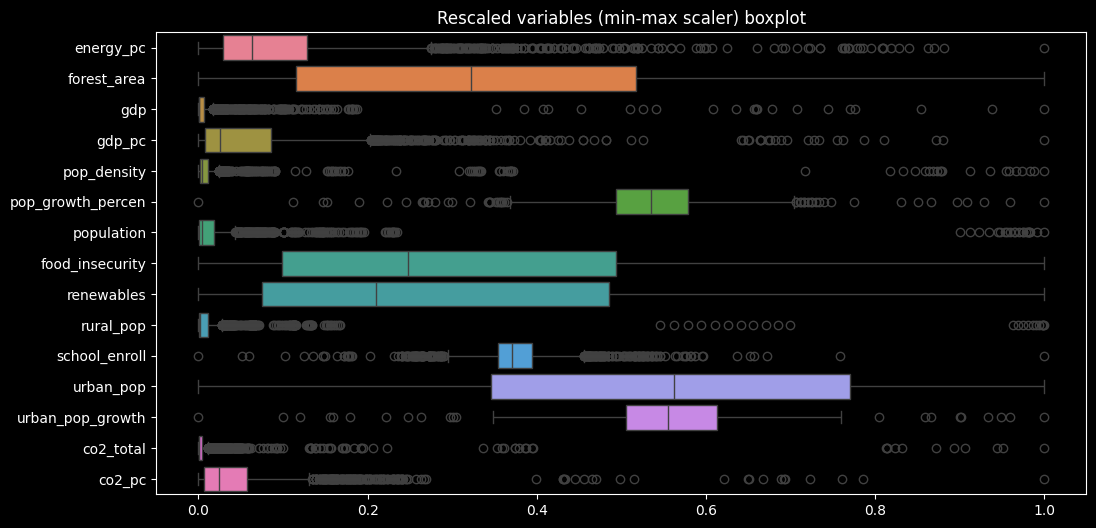

In [21]:
from sklearn.preprocessing import MinMaxScaler


num_vars = df_final.select_dtypes(include=['int64', 'float64'])

scaled = MinMaxScaler().fit_transform(num_vars)
scaled_df = pd.DataFrame(scaled, columns=num_vars.columns)

plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df, orient="h")
plt.title("Rescaled variables (min-max scaler) boxplot")
plt.show()


c:\Users\salva\Documents\tec\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


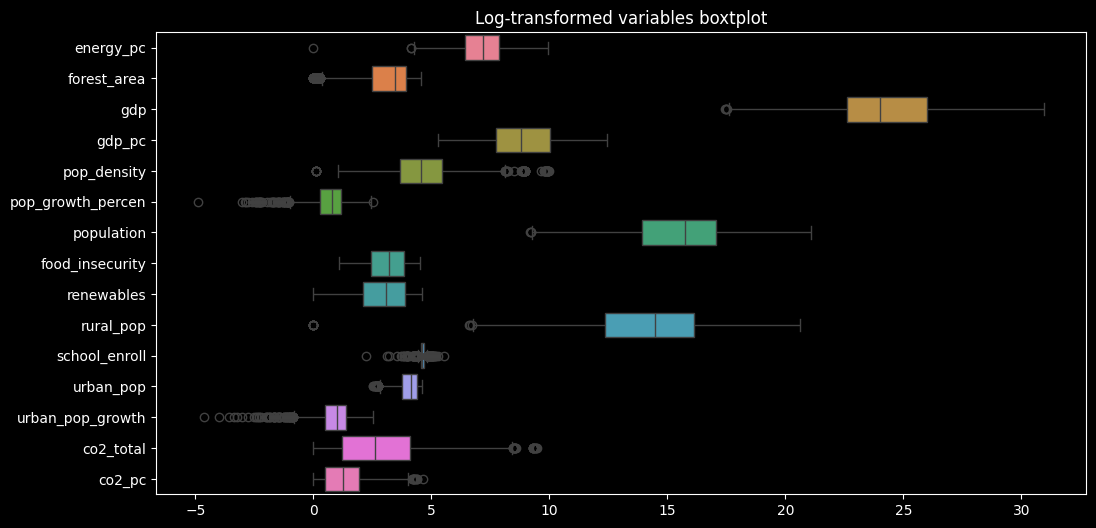

In [22]:
num_vars = df_final.select_dtypes(include=['int64', 'float64'])



num_vars = num_vars.apply(lambda x: np.log1p(x)) 

plt.figure(figsize=(12,6))
sns.boxplot(data=num_vars, orient="h")
plt.title("Log-transformed variables boxtplot")
plt.show()


### Correlations

In [23]:
# correlation matrix
corr_matrix = df_final.select_dtypes(include=['int64', 'float64']).corr() 
corr_matrix

,energy_pc,forest_area,gdp,gdp_pc,pop_density,pop_growth_percen,population,food_insecurity,renewables,rural_pop,school_enroll,urban_pop,urban_pop_growth,co2_total,co2_pc
energy_pc,1.000000,-0.137403,0.143905,0.490561,0.160679,-0.020193,-0.041060,-0.440084,-0.351881,-0.078324,0.030293,0.538984,-0.150521,0.083690,0.632308
forest_area,-0.137403,1.000000,0.007040,-0.105834,-0.163273,-0.177712,-0.039383,0.095282,0.131965,-0.055041,0.002998,-0.047074,-0.144227,-0.020248,-0.018937
gdp,0.143905,0.007040,1.000000,0.150762,-0.022989,-0.071478,0.563438,-0.186849,-0.111397,0.374484,-0.008976,0.132167,-0.062270,0.810139,0.133113
gdp_pc,0.490561,-0.105834,0.150762,1.000000,0.424298,-0.086870,-0.062402,-0.377083,-0.260344,-0.091571,0.041708,0.419609,-0.205352,0.035690,0.318736
pop_density,0.160679,-0.163273,-0.022989,0.424298,1.000000,0.019366,-0.025942,-0.155648,-0.133150,-0.018532,0.090815,0.229727,-0.030557,-0.023807,0.061529
pop_growth_percen,-0.020193,-0.177712,-0.071478,-0.086870,0.019366,1.000000,-0.011564,0.373383,0.341576,0.014189,-0.003526,-0.171454,0.943771,-0.058502,-0.010865
population,-0.041060,-0.039383,0.563438,-0.062402,-0.025942,-0.011564,1.000000,-0.100121,-0.000935,0.959016,0.007877,-0.058440,0.056886,0.806285,-0.002988
food_insecurity,-0.440084,0.095282,-0.186849,-0.377083,-0.155648,0.373383,-0.100121,1.000000,0.660264,-0.056811,0.007013,-0.529340,0.485967,-0.150087,-0.382584
renewables,-0.351881,0.131965,-0.111397,-0.260344,-0.133150,0.341576,-0.000935,0.660264,1.000000,0.045647,0.002007,-0.494770,0.468501,-0.101929,-0.381477
rural_pop,-0.078324,-0.055041,0.374484,-0.091571,-0.018532,0.014189,0.959016,-0.056811,0.045647,1.000000,0.013597,-0.130859,0.087724,0.627217,-0.039198


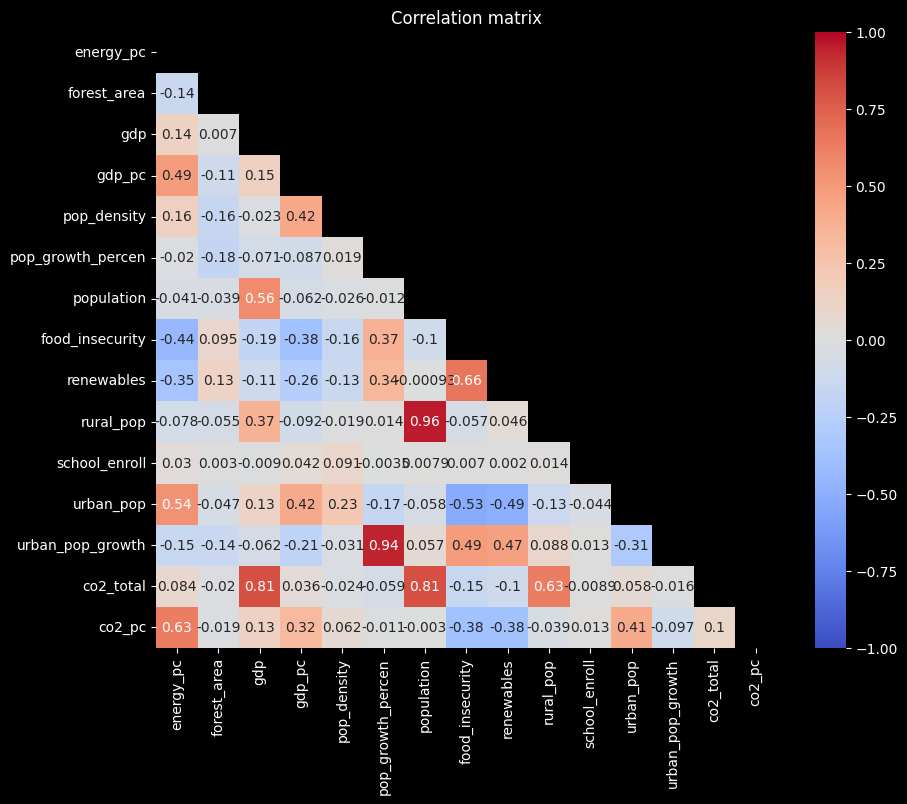

In [24]:
# correlation matrix visualization per intensity 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

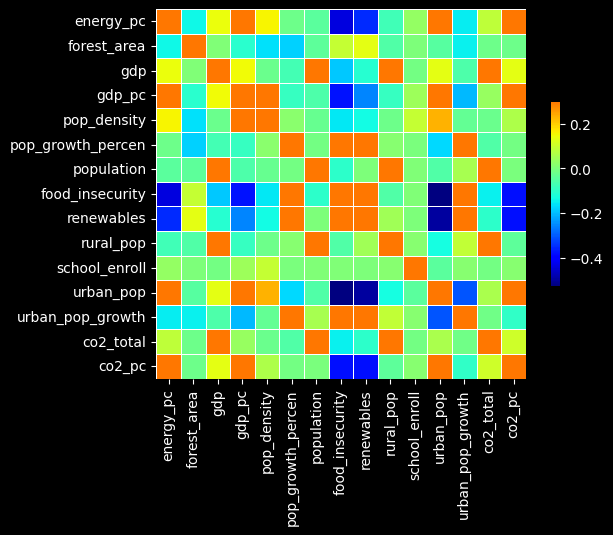

In [25]:
# general visualization of the correlation matrix
sns.heatmap(corr_matrix, vmax=.3, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

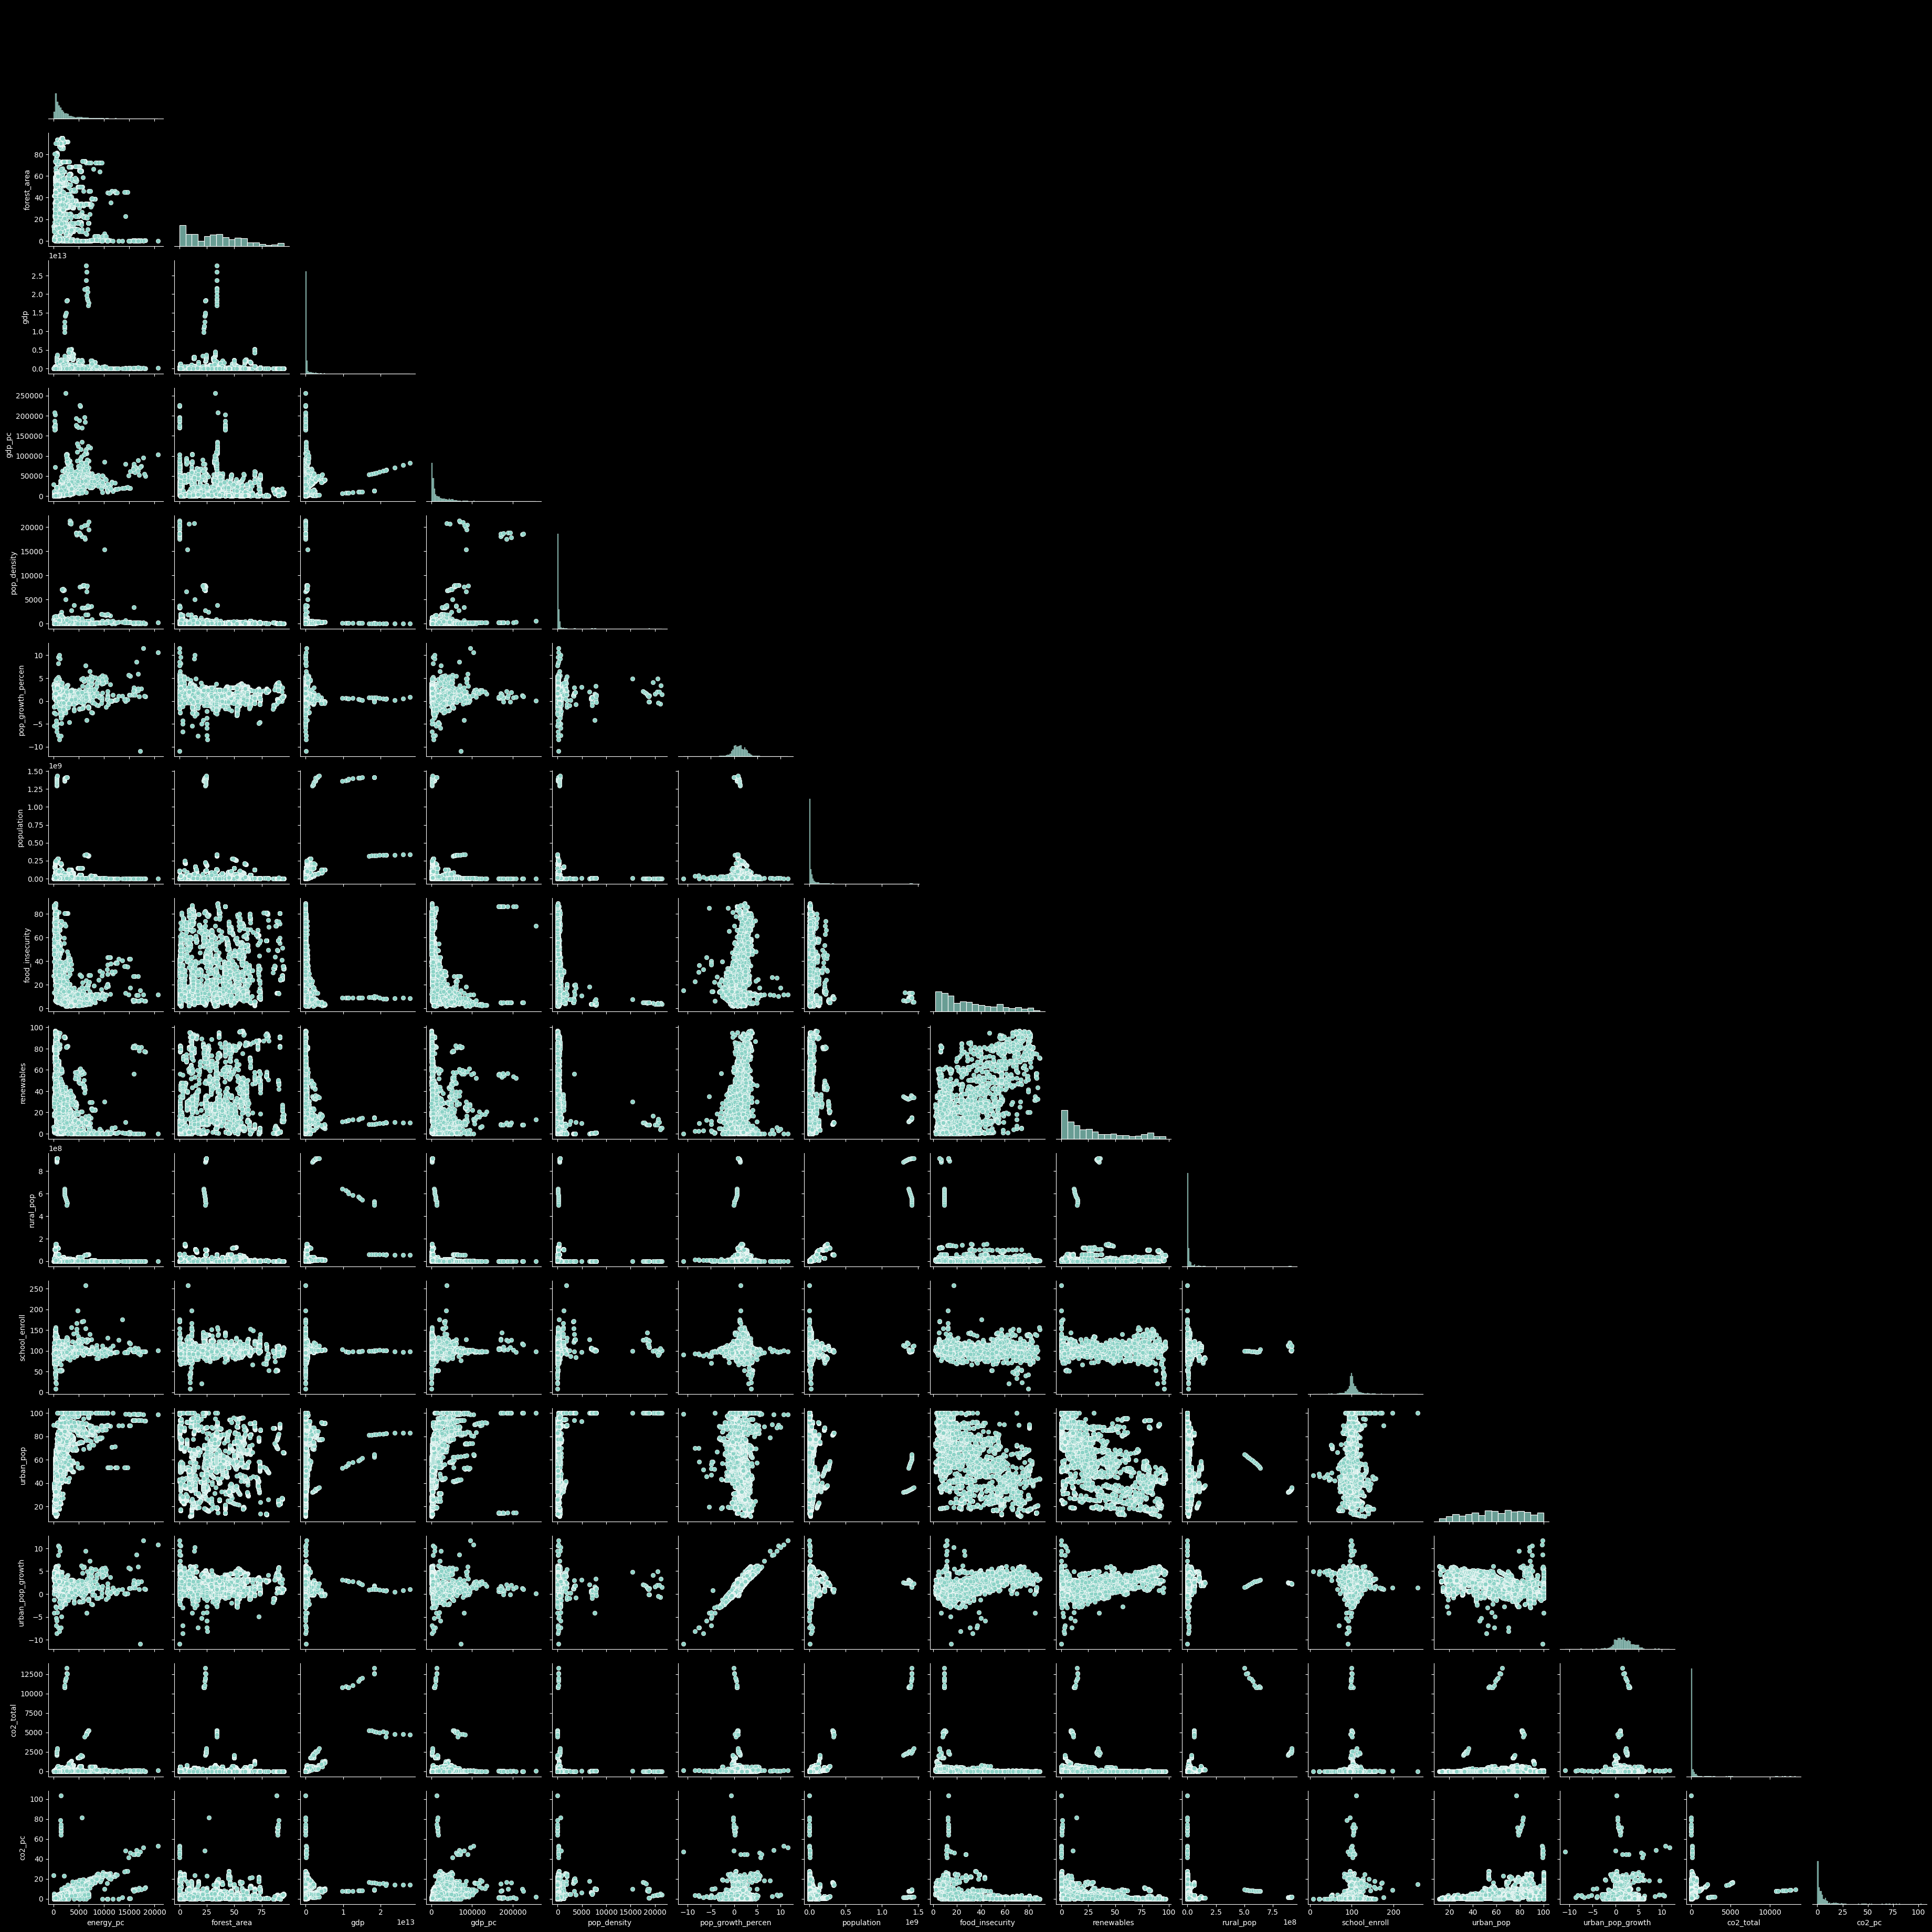

In [26]:
# Pairwise correlation
sns.pairplot(df_final, corner=True)
plt.show()

In [27]:
# finally, we cast the type of year to turn it to a valid integer type 

df_final['year'] = df_final['year'].str.replace('YR', '').astype(int)


In [28]:
df_final.to_csv('../co2_World_Bank.csv', index=False)